# Machine learning project: wine reviews


## About the data

The data that I am using is from the kaggle website:
https://www.kaggle.com/zynicide/wine-reviews/data

It's a concatenation of many wine reviews.

In [92]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import category_encoders as ce
import sklearn as skl

In [65]:
# plot parameters

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 14

In [2]:
# Open data

datafile = 'data/wine-reviews/winemag-data-130k-v2.csv'
data_small = pd.read_csv(datafile, nrows=10)

In [4]:
data_small

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Analysis of data content

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' nan 'Turkey' 'Czech Republic'
 'Slovenia' 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon'
 'Serbia' 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia'
 'Macedonia' 'China' 'Egypt'] country    43
dtype: int64
number of nans = country    63
dtype: int64


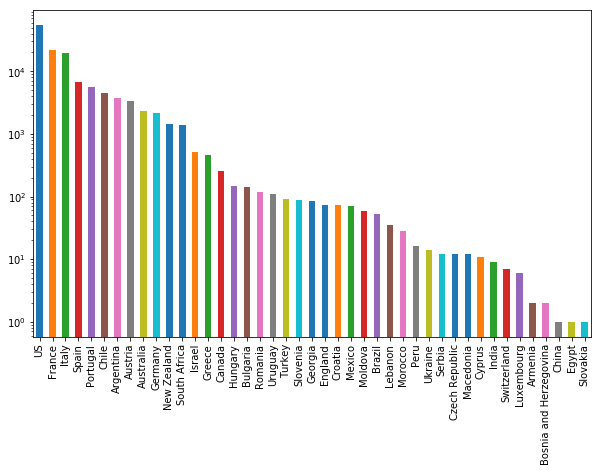

In [32]:
countries = pd.read_csv(datafile, usecols=[1])
print(countries.country.unique(), countries.nunique())
pd.value_counts(countries['country']).plot.bar(figsize=(10,6), logy=True)
count_nan = len(countries) - countries.count()
print('number of nans = {}'.format(count_nan))

In [34]:
# Designation

col_desig =pd.read_csv(datafile, usecols=[3])
print(col_desig.nunique())

designation    37979
dtype: int64


number of nans = points    0
dtype: int64


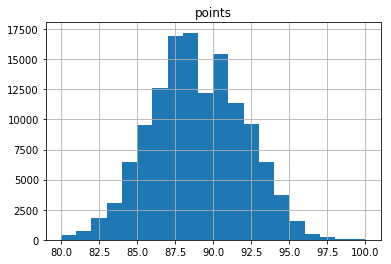

In [61]:
# Points
col_points =pd.read_csv(datafile, usecols=[4])
col_points.hist(bins=20)

count_nan = len(col_points) - col_points.count()
print('number of nans = {}'.format(count_nan))

number of nans = price    8996
dtype: int64


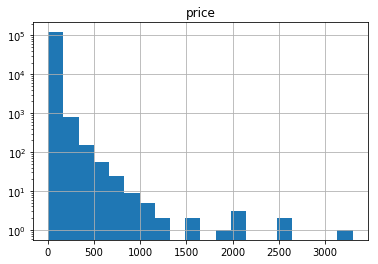

In [62]:
# Price
col_price =pd.read_csv(datafile, usecols=[5])
col_price.hist(bins=20, log=True)

count_nan = len(col_price) - col_price.count()
print('number of nans = {}'.format(count_nan))

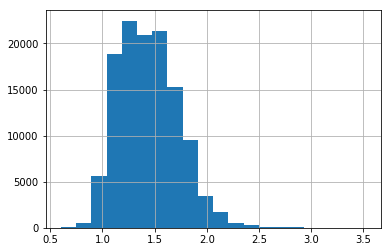

In [48]:
# Log of price histogram
col_price['price'].apply(np.log10).hist(bins=20)

taster_name    19
dtype: int64


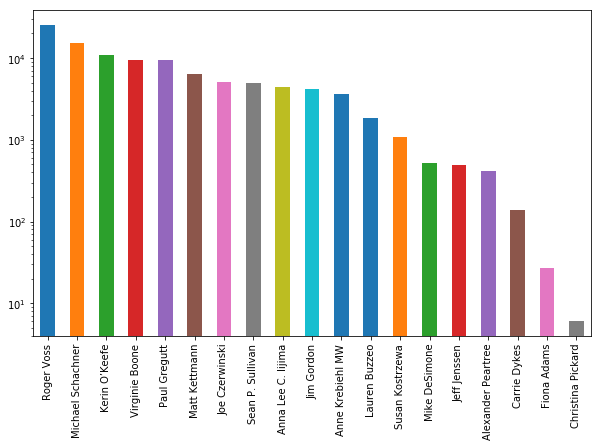

In [51]:
# Taster name

col_taster =pd.read_csv(datafile, usecols=[9])
print(col_taster.nunique())
pd.value_counts(col_taster['taster_name']).plot.bar(figsize=(10,6), logy=True)

In [55]:
# Varieties

col_vars =pd.read_csv(datafile, usecols=[12])
print(col_vars.nunique())

variety    707
dtype: int64


In [56]:
# Wineries

col_wineries =pd.read_csv(datafile, usecols=[13])
print(col_wineries.nunique())


winery    16757
dtype: int64


In [58]:
# Provinces

col_prov = pd.read_csv(datafile, usecols=[6])
print(col_prov.nunique())

count_nan = len(col_prov) - col_prov.count()
print('number of nans = {}'.format(count_nan))

province    425
dtype: int64
number of nans = province    63
dtype: int64


In [59]:
# Region 1

col_reg1 = pd.read_csv(datafile, usecols=[7])
print(col_reg1.nunique())

count_nan = len(col_reg1) - col_reg1.count()
print('number of nans = {}'.format(count_nan))

region_1    1229
dtype: int64
number of nans = region_1    21247
dtype: int64


In [60]:
# Region 2

col_reg2 = pd.read_csv(datafile, usecols=[8])
print(col_reg2.nunique())

count_nan = len(col_reg2) - col_reg2.count()
print('number of nans = {}'.format(count_nan))

# This is probably useless

region_2    17
dtype: int64
number of nans = region_2    79460
dtype: int64


## Correlation between price and points

Text(0,0.5,'points')

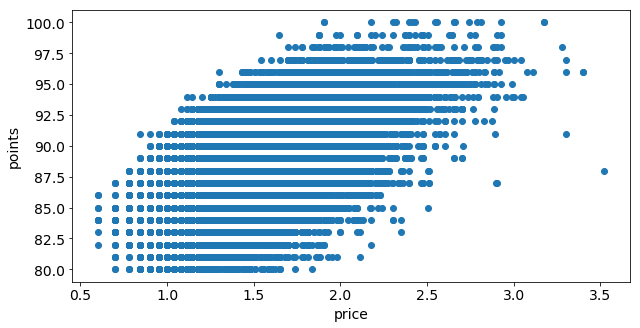

In [66]:
price_points = pd.read_csv(datafile, usecols=[4,5])
price_points['price'] = price_points['price'].apply(np.log10)

plt.scatter(price_points['price'], price_points['points'])
plt.xlabel('price')
plt.ylabel('points')


### How much data is missing

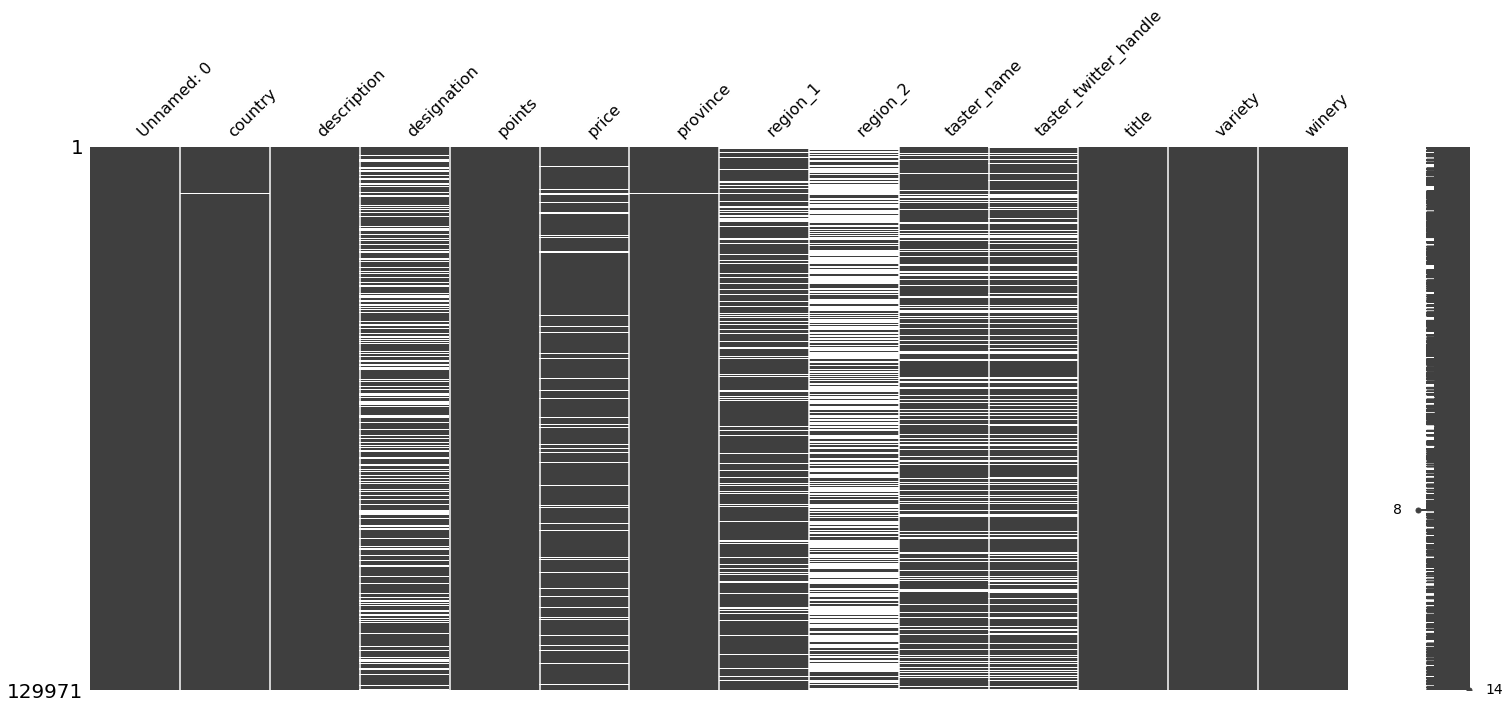

In [69]:
fulldata = pd.read_csv(datafile)
msno.matrix(fulldata)

## How much can we guess the rating from objective wine parameters

In [77]:
# As a first approach, we just drop data with missing samples
# We remove two columns with much missing values

fulldata_noreg2 = fulldata.drop(columns=['region_2','designation'])
fulldata_nona = fulldata_noreg2.dropna()
len(fulldata_nona)

74292

In [91]:
# Preparing data

X_data = fulldata_nona.drop(columns=['description', 'title', 'taster_twitter_handle','points']) # forget description for now
y_data = fulldata_nona['points']

# Price on log scale for nicer numbers
X_data['price'] = X_data['price'].apply(np.log10)


In [119]:
# First approach: use hashing on categorical features

hashing = ce.HashingEncoder()
hashing.fit(X_data, y_data)

X_data_hashed = hashing.transform(X_data)

In [133]:
# rescale target
# Choose to get 5 labels, in order to train classifier

scaling = lambda p: int((p-80)/4.)

y_data_scaled = y_data.apply(scaling)


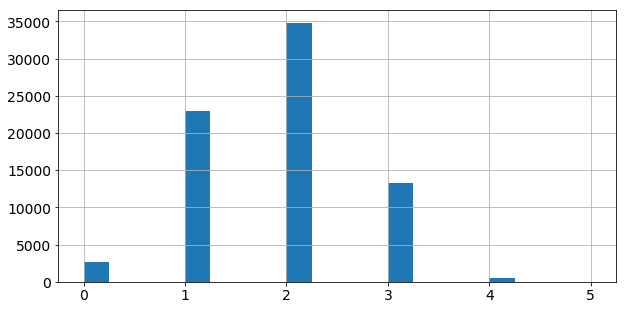

In [134]:
# Get grade from zero to five
# bad, ok, good, excellent, OOTW (out of this world)

y_data_scaled.hist(bins=20)

In [136]:
# Split data between training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_hashed, y_data_scaled)

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
# Testing classification problem with random forests

RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [141]:
print(RFC.score(X_train, y_train), RFC.score(X_test, y_test))

0.9747482905292629 0.533462553168578
